In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [4]:
pdata = pd.read_csv("pima-indians-diabetes.csv")

In [30]:
pdata

,Plas,Pres,skin,mass,pedi,age,class
0,148.0,72.0,35.000000,33.6,0.627,50,1
1,85.0,66.0,29.000000,26.6,0.351,31,0
2,183.0,64.0,20.536458,23.3,0.672,32,1
3,89.0,66.0,23.000000,28.1,0.167,21,0
4,137.0,40.0,35.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,101.0,76.0,48.000000,32.9,0.171,63,0
764,122.0,70.0,27.000000,36.8,0.340,27,0
765,121.0,72.0,23.000000,26.2,0.245,30,0
766,126.0,60.0,20.536458,30.1,0.349,47,1


In [35]:
pdata['age']


0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: age, Length: 768, dtype: int64

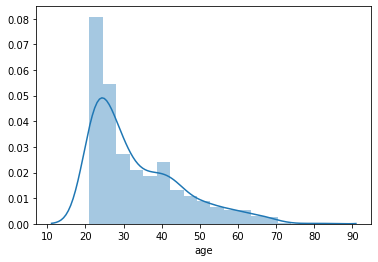

In [36]:
sns.distplot(pdata['age'])

In [32]:
pdata['mass'].replace(0,pdata['mass'].mean(),inplace=True)

In [29]:
pdata.drop(labels='test',axis=1,inplace=True)

In [37]:
from sklearn.model_selection import train_test_split

X = pdata.drop('class',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Plas,Pres,skin,mass,pedi,age
88,136.0,70.0,32.0,37.1,0.153,43
467,97.0,64.0,36.0,36.8,0.600,25
550,116.0,70.0,28.0,27.4,0.204,21
147,106.0,64.0,35.0,30.5,1.400,34
481,123.0,88.0,37.0,35.2,0.197,29


In [38]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5  intercept
0  0.025858 -0.027288 -0.015771  0.078135  0.32385  0.025885  -5.032671


In [39]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7748917748917749


In [42]:
model.predict([[12,23,143,12,12,22]])

array([0], dtype=int64)

In [43]:
pickle.dump(model, open('model_diabetics.pkl','wb'))

<IPython.core.display.Javascript object>

In [44]:
pdata.to_csv("modified diabetics datase.csv",index=False)